In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import multivariate_normal as mvn
from math import sqrt

In [50]:
data = np.array([[777, 1],
[781, 0],
[843, 0],
[866, 0],
[869, 1],
[872, 1],
[876, 1],
[893, 1],
[894, 1],
[895, 0],
[898, 1],
[906, 0],
[907, 1],
[909, 1],
[911, 1],
[911, 0],
[914, 0],
[927, 1],
[932, 1],
[936, 0],
[940, 0],
[942.5, 0],
[943, 0],
[945, 1],
[945, 0],
[948, 1],
[951, 0],
[953, 0],
[956, 0],
[957, 1],
[957, 0],
[959, 0],
[960, 0],
[966, 1],
[966, 0],
[969, 1],
[970, 0],
[971, 1],
[972, 0],
[973, 0],
[977, 0],
[983, 1],
[984, 0],
[985, 1],
[989, 1],
[992.5, 1],
[993, 1],
[996, 1],
[998, 1],
[1001, 0],
[1002, 0],
[1005, 0],
[1006, 0],
[1009, 1],
[1011.5, 1],
[1012, 1],
[1012, 0],
[1013, 0],
[1015, 0],
[1016, 0],
[1018, 0],
[1022, 1],
[1023, 0],
[1025, 1],
[1027, 0],
[1029, 1],
[1031, 1],
[1031, 0],
[1031.5, 0],
[1033, 1],
[1036, 1],
[1043, 1],
[1043, 0],
[1044, 1],
[1044, 0],
[1045, 0],
[1047, 0],
[1053, 1],
[1055, 1],
[1058, 0],
[1059, 1],
[1060, 1],
[1060, 0],
[1064, 0],
[1070, 0],
[1073, 0],
[1080, 1],
[1085, 1],
[1093, 0],
[1093.5, 1],
[1094, 1],
[1106, 0],
[1107, 0],
[1118, 0],
[1128, 1],
[1139, 1],
[1153, 0]])

In [51]:
data.shape

(97, 2)

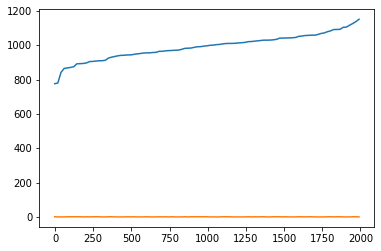

In [52]:
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(mu - sigma, mu + 3*sigma, 97)
X = np.meshgrid(x)
X = np.array(X).reshape(-1, 1)

plt.plot(X, data)
plt.show()

In [53]:
data_processed = data.reshape(-1, 1)
data_processed.shape

(194, 1)

In [54]:
# k = 1
# model = GMM(n_components=k, max_iter=10000, covariance_type='full')
# model.fit(data_processed)
# print(model.means_)
# print(np.sqrt(model.covariances_))
# print(mu)
# print(sigma)

n = len(data)
n

97

In [55]:
def one_minus_H_n(x, data):
    n = len(data)
    result = 0
    for i in range(n):
        result += 1 if data[i][0] > x else 0
    result /= n
    return result

In [56]:
def Lambda_1n(x, data):
    n = len(data)
    result = 0
    numerator = 0
    denominator = 0
    for i in range(n):
        denominator = 0
        numerator = data[i][1] * (1 if data[i][0] <= x else 0)
        for j in range(n):
            denominator += (1 if data[j][0] >= data[i][0] else 0)
        result += numerator / denominator
    return result

In [57]:
def Lambda_n(x, data):
    n = len(data)
    result = 0
    numerator = 0
    denominator = 0
    for i in range(n):
        denominator = 0
        numerator = 1 if data[i][0] <= x else 0
        for j in range(n):
            denominator += (1 if data[j][0] >= data[i][0] else 0)
        result += numerator / denominator
    return result

In [58]:
def FnRR(x, data):
    result = 1 - one_minus_H_n(x, data)**(Lambda_1n(x, data) / Lambda_n(x, data))
    return result

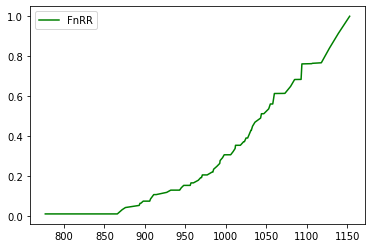

In [59]:
z = [data[i][0] for i in range(97)]

plt.plot(z, [FnRR(t, data) for t in z], color='g', label='FnRR')
plt.legend()
plt.show()

In [60]:
def calculate_mu_and_sigma(z, data):
    n = len(data)
    mu = z[0] * FnRR(z[0], data)
    for i in range(2, n):
        mu += z[i] * ( FnRR(z[i], data) - FnRR(z[i-1], data) )
    variance = (z[0] - mu) ** 2 * FnRR(z[0], data)
    for i in range(2, n):
        variance += (z[i] - mu) ** 2 * ( FnRR(z[i], data) - FnRR(z[i-1], data) )
    sigma = sqrt(variance)
    return mu, sigma

In [61]:
mu, sigma = calculate_mu_and_sigma(z, data)

print(mu)
print(sigma)

1039.7833741995091
81.9647172814403


In [62]:
data_processed = (data[:, 0] - mu) / sigma
#data_norm = np.delete(data_norm, 1, 1)  # delete second column of C
data_processed = np.c_[data_processed, data[:, 1]]

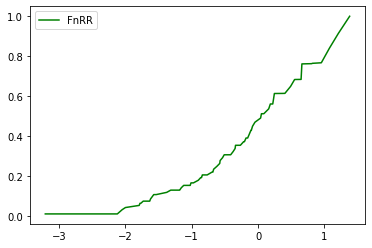

In [63]:
z = [data_processed[i][0] for i in range(97)]

plt.plot(z, [FnRR(t, data_processed) for t in z], color='g', label='FnRR')
plt.legend()
plt.show()

In [64]:
z = [data_processed[i][0] for i in range(97)]

mu, sigma = calculate_mu_and_sigma(z, data_processed)

print(mu)
print(sigma)

3.5417227168543786e-06
0.9999999999937279


In [65]:
data_processed = data_processed[:, 0].reshape(-1, 1)

In [66]:
k = 1
model = GMM(n_components=k, max_iter=10000, covariance_type='full')
model.fit(data_processed)
print(model.means_)
print(np.sqrt(model.covariances_))

[[-0.58832044]]
[[[0.8946689]]]


In [67]:
data_norm[:, 0]

array([-3.20605479, -3.1572533 , -2.40083027, -2.12022172, -2.08362061,
       -2.0470195 , -1.99821801, -1.79081169, -1.77861132, -1.76641095,
       -1.72980984, -1.63220686, -1.62000649, -1.59560575, -1.57120501,
       -1.57120501, -1.53460389, -1.37599906, -1.31499721, -1.26619572,
       -1.21739423, -1.18689331, -1.18079312, -1.15639238, -1.15639238,
       -1.11979126, -1.08319015, -1.0587894 , -1.02218829, -1.00998792,
       -1.00998792, -0.98558718, -0.9733868 , -0.90018458, -0.90018458,
       -0.86358346, -0.85138309, -0.83918272, -0.82698235, -0.81478197,
       -0.76598049, -0.69277826, -0.68057789, -0.66837752, -0.61957603,
       -0.57687473, -0.57077454, -0.53417343, -0.50977269, -0.47317157,
       -0.4609712 , -0.42437009, -0.41216972, -0.3755686 , -0.34506767,
       -0.33896749, -0.33896749, -0.32676712, -0.30236637, -0.290166  ,
       -0.26576526, -0.21696377, -0.2047634 , -0.18036266, -0.15596191,
       -0.13156117, -0.10716043, -0.10716043, -0.10106024, -0.08